In [739]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [740]:
#Read data and glimpse

df=pd.read_csv("OneDrive - SAP SE\Desktop\geoiq\singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv")
df.head()

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [741]:
#Check to see if there are any null values, and if there are view the columns containing them
if(df.isnull().values.any()):
    print("There are null values in the columns: ", df.columns[df.isna().any()].to_list())
else:
    print("There are no null values.")

There are no null values.


In [742]:
#To check if there are any erroneous records

df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
year       20460 non-null int64
level_1    20460 non-null object
level_2    20460 non-null object
value      20460 non-null object
dtypes: int64(1), object(3)
memory usage: 639.5+ KB


year        int64
level_1    object
level_2    object
value      object
dtype: object

In [743]:
#To check why type of value is object

#df['value']=df['value'].astype('int')            confirm the presence of string na
df['value'].value_counts()                        #We see that NA is the reason.
df['value']=df['value'].replace('na',0)           #Replacing NA by 0, assuming NA (Not available) means none exist that category
df['value']=df['value'].astype('int')

In [744]:
#Data preparation: Get the Gender and Ethinicity as seperate columns

df['Gender']=""
df['Ethnicity']=""
df.dtypes
for i in df.index:
    if(' Male' in df.iloc[i]['level_1']):
        df.at[i,'Gender'] = 'Male'
    elif('Female' in df.iloc[i]['level_1']):
        df.at[i,'Gender'] = 'Female'
        
    if('Malays' in df.iloc[i]['level_1']):
        df.at[i,'Ethnicity'] = 'Malays'
    elif('Chinese' in df.iloc[i]['level_1']):
        df.at[i,'Ethnicity'] = 'Chinese'
    elif('Indians' in df.iloc[i]['level_1']):
        df.at[i,'Ethnicity'] = 'Indians'
    elif('Other' in df.iloc[i]['level_1']):
        df.at[i,'Ethnicity'] = 'Other'
        
#Fill the Gender and Ethnicity values with more meaningful name
df[['Gender','Ethnicity']]=df[['Gender','Ethnicity']].replace('','All')

In [745]:
#Largest ethnic group in Singapore

#Fitering out the duplicates rows in gender, since ethnicity is independent of any gender
df1=df[df['Gender']=='All']

#Grouping by Ethnicity and year
ethnic_ = df1.groupby(['year','Ethnicity'])['value'].sum()
ethnic_ = ethnic_.reset_index()

#Removing the rows with All ethnic groups as they are useless to find out a specific Ethnic group
ethnic_filtered = ethnic_[ethnic_['Ethnicity'] != 'All']
ethnic_filtered_top=ethnic_filtered.sort_values('value', ascending=False).drop_duplicates(['year']).sort_values('year') #To get the dominant Ethinc group each year

#Since there Chinese is the largest ethnicity each year
print("Largest ethnicity in Singapore is: ", ethnic_filtered_top.Ethnicity.unique())

Largest ethnicity in Singapore is:  ['Chinese']


In [746]:
# Calculate average population growth of Chinese ethinicty over the years
# Formula = ((Sum of (j-i)/i) * 100 )/n-1     where i and j are values for consecutive years

avg_growth=0
for i, j in zip(ethnic_filtered_top['value'], ethnic_filtered_top['value'][1:]):
    # Calculate the average to i (current year) to j (next year)
    avg_growth+=(j-i)/i
avg_growth=(avg_growth*100)/(ethnic_filtered_top.shape[0]-1)
print("Average population growth of Chinese ethinicty over the years is: ",avg_growth, ' %')

Average population growth of Chinese ethinicty over the years is:  2.077252252207557  %


In [747]:
#proportion of the total population Chinese constitute.

ethnic_filtered_all=ethnic_filtered.groupby('year')['value'].sum()   #Total population by year for all ethnicity
avg=0
Yearwise_Proportion={}
for i,j,k in zip(ethnic_filtered_top['value'],ethnic_filtered_all,ethnic_filtered_top['year']):
    Yearwise_Proportion[k]=(i*100)/j
    avg+=Yearwise_Proportion[k]
    
print("Average proportion of the total population Chinese ethinicty over the years is: ",avg/ethnic_filtered_all.shape[0], ' %')
print("\nYearwise proportion of the total population of Chinese ethinicty: ", Yearwise_Proportion)

Average proportion of the total population Chinese ethinicty over the years is:  76.48018740818709  %

Yearwise proportion of the total population of Chinese ethinicty:  {1957: 74.7896678675626, 1958: 75.16748548459134, 1959: 75.4181418630204, 1960: 75.57831538054035, 1961: 75.65058937418142, 1962: 75.72503874252823, 1963: 75.86281276962899, 1964: 75.92495270128232, 1965: 75.91405568945183, 1966: 75.82933653077538, 1967: 75.61582361836008, 1968: 75.64863571086644, 1969: 75.69032136462162, 1970: 77.1974830928791, 1971: 75.90377820059798, 1972: 76.01207386363636, 1973: 76.11050685229498, 1974: 76.18295182781004, 1975: 76.26377323576415, 1976: 76.31077611198542, 1977: 76.4144401386906, 1978: 76.43840025750382, 1979: 76.47922536608596, 1980: 78.76295724155057, 1981: 78.57024962585481, 1982: 78.51734491800651, 1983: 78.43067215746706, 1984: 78.341865585898, 1985: 78.2518628291876, 1986: 78.16139712807733, 1987: 78.04450908738484, 1988: 77.95948305142788, 1989: 77.90582129865007, 1990: 78.15

In [748]:
#Largest age group in singapore

#Using df1: Since Age-group is independent of any gender,  Fitering out the duplicate rows in gender and Ethnicity 
df2=df1[df1['Ethnicity']=='All']

#Grouping by Agegroup and year
age_ = df2.groupby(['year','level_2'])['value'].sum()
age_ = age_.reset_index()

#Finding the largest age group over each year
age_filtered_top=age_.sort_values('value', ascending=False).drop_duplicates(['year']).sort_values('year')
print("Largest age group over each year is: \n", age_filtered_top)

#Since there Chinese is the largest ethnicity each year
print("Largest age group in Singapore over following years were: \n", age_filtered_top.level_2.unique())

Largest age group over each year is: 
       year          level_2   value
0     1957    0  -  4 Years  264727
22    1958    0  -  4 Years  277800
44    1959    0  -  4 Years  288800
66    1960    0  -  4 Years  297000
88    1961    0  -  4 Years  303700
...    ...              ...     ...
1268  2014  65 Years & Over  431601
1290  2015  65 Years & Over  459715
1312  2016  65 Years & Over  487570
1334  2017  65 Years & Over  516692
1356  2018  65 Years & Over  547854

[62 rows x 3 columns]
Largest age group in Singapore over following years were: 
 ['0  -  4 Years' '5  -  9 Years' '10 - 14 Years' '15 - 19 Years'
 '20 - 24 Years' '25 - 29 Years' '30 - 34 Years' '35 - 39 Years'
 '40 - 44 Years' '45 - 49 Years' '65 Years & Over']


In [749]:
# Calculate average population growth of the latest (year 2018) large age group : 65 years & over
# Formula = ((Sum of (j-i)/i) * 100 )/n-1     where i and j are values for consecutive years

age_65plus = age_[age_['level_2']=='65 Years & Over']
avg_growth2=0
for i, j in zip(age_65plus['value'], age_65plus['value'][1:]):
    # Calculate the average to i (current year) to j (next year)
    avg_growth2+=(j-i)/i
avg_growth2=(avg_growth2*100)/(age_65plus.shape[0]-1)
print("Average population growth of 65 & over age group's population over the years is: ",avg_growth2, ' %')

Average population growth of 65 & over age group's population over the years is:  4.834486727316471  %


In [750]:
#proportion of the total population 65 years & over constitute.

age_filtered_all=age_.groupby('year')['value'].sum()   #Total population by year across all age groups
avg=0
Yearwise_AgeProportion={}
for i,j,k in zip(age_65plus['value'],age_filtered_all,age_65plus['year']):
    Yearwise_AgeProportion[k]=(i*100)/j
    avg+=Yearwise_AgeProportion[k]
    
print("Average proportion of the total population 65 years & over age group over the years is: ",avg/age_filtered_all.shape[0], ' %')
print("\nYearwise proportion of the total population of 65 years & over age group: ", Yearwise_AgeProportion)

Average proportion of the total population 65 years & over age group over the years is:  5.234564248036611  %

Yearwise proportion of the total population of 65 years & over age group:  {1957: 2.067696576294948, 1958: 2.1706924315619966, 1959: 2.199765851253928, 1960: 2.226973098164974, 1961: 2.228348265563979, 1962: 2.3107836570663096, 1963: 2.3819882532086143, 1964: 2.4214486303184444, 1965: 2.4757080835228447, 1966: 2.588377480108772, 1967: 2.6867434307646887, 1968: 2.787843648837996, 1969: 2.876842605801236, 1970: 3.1937120264851497, 1971: 3.3705295893167473, 1972: 3.536055214448976, 1973: 3.659447348767737, 1974: 3.825749406944145, 1975: 3.8868357334012997, 1976: 4.050039747290908, 1977: 4.166666666666667, 1978: 4.305753201870298, 1979: 4.403802189868848, 1980: 4.4759503591900875, 1981: 4.6281278407731685, 1982: 4.716192677190963, 1983: 4.8104311661694314, 1984: 4.907707718874297, 1985: 5.021124315504811, 1986: 5.128356372123338, 1987: 5.255125978188851, 1988: 5.363060676192146, 1

In [751]:
#Trends on growth rate

#Ethnicity trends.
Dict_Ethnicity={}
for each in ethnic_filtered.Ethnicity.unique():
    df_eth=ethnic_filtered[ethnic_filtered['Ethnicity']==each]    #loop over each Ehnicity
    avg_growth_x=0
    for i, j in zip(df_eth['value'], df_eth['value'][1:]):
        # Calculate the average to i (current year) to j (next year)
        avg_growth_x+=(j-i)/i
    avg_growth_x=(avg_growth_x*100)/(df_eth.shape[0]-1)
    Dict_Ethnicity[each]=avg_growth_x
Dict_Ethnicity = sorted(Dict_Ethnicity.items(), key=lambda x: x[1], reverse=True) #Sorting th dictionary 
print("Average Growth rate for each Ethnicity over the years is: \n",Dict_Ethnicity)
print(color.BOLD + '\n Hence Other Ethnicity has highest growth rate and Malays have least growth rate\n\n' + color.END)



#Age groups trends.
Dict_age={}

for each in age_.level_2.unique():
    df_age=age_[age_['level_2']==each]    #loop over each Ehnicity
    avg_growth_x=0
    for i, j in zip(df_age['value'], df_age['value'][1:]):
        # Calculate the average to i (current year) to j (next year)
        if i!=0:
            avg_growth_x+=(j-i)/i
    avg_growth_x=(avg_growth_x*100)/(df_age.shape[0]-1)
    Dict_age[each]=avg_growth_x
Dict_age = sorted(Dict_age.items(), key=lambda x: x[1], reverse=True) #Sorting th dictionary     
print("Average Growth rate for each Ethnicity over the years is: \n",Dict_age)
print(color.BOLD + '\n Hence "70 & over" has highest growth rate and "75 to 79" has the most decreasing rate \n\n' + color.END)

#Gender trends.
df3=df[(df['Gender']!='All') & (df['Ethnicity']=='All')]

#Grouping by Gender and year
gender_ = df3.groupby(['year','Gender'])['value'].sum()
gender_ = gender_.reset_index()

Dict_gender={}
for each in gender_.Gender.unique():
    df_gen=gender_[gender_['Gender']==each]    #loop over each Ehnicity
    avg_growth_x=0
    for i, j in zip(df_gen['value'], df_gen['value'][1:]):
        # Calculate the average to i (current year) to j (next year)
        avg_growth_x+=(j-i)/i
    avg_growth_x=(avg_growth_x*100)/(df_gen.shape[0]-1)
    Dict_gender[each]=avg_growth_x
Dict_gender = sorted(Dict_gender.items(), key=lambda x: x[1], reverse=True) #Sorting th dictionary 
print("Average Growth rate for each Gender over the years is: \n",Dict_gender)
print(color.BOLD + '\n Hence Females have a higher growth rate as compared to Male\n\n' + color.END)

Average Growth rate for each Ethnicity over the years is: 
 [('Other', 3.0958090029080543), ('Chinese', 2.077252252207557), ('Indians', 2.045523844987338), ('Malays', 1.9018624811842262)]

 Hence Other Ethnicity has highest growth rate and Malays have least growth rate


Average Growth rate for each Ethnicity over the years is: 
 [('70 Years & Over', 5.192469598048392), ('65 Years & Over', 4.834486727316471), ('65 - 69 Years', 4.449244885436874), ('60 - 64 Years', 4.096601538724642), ('55 - 59 Years', 3.546481579137944), ('50 - 54 Years', 3.028141101155211), ('45 - 49 Years', 2.5972480822075594), ('40 - 44 Years', 2.3565786137285682), ('35 - 39 Years', 2.2375449542307377), ('30 - 34 Years', 1.9468449458647303), ('25 - 29 Years', 1.6581357498276144), ('20 - 24 Years', 1.3453074791318238), ('15 - 19 Years', 0.9312642495490828), ('10 - 14 Years', 0.7643436830837104), ('5  -  9 Years', -0.11038479325065506), ('75 Years & Over', -0.11754742051402889), ('85 Years & Over', -0.5015792790543715

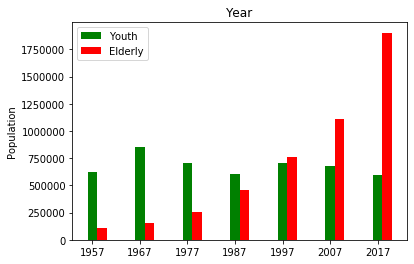

Insight: Clearly we see that number of Elderly people is increasing significantly which has caused their numnber to be much more the numnber of youth by 2017


In [752]:
#Plotting graph on population trends: To see the trend amongst youth and elderly in singapore

youth_list=['0  -  4 Years', '5  -  9 Years','10 - 14 Years']     #youth: 0 to 15 years
elderly_list=['60 - 64 Years', '65 - 69 Years', '65 Years & Over',
       '70 - 74 Years', '70 Years & Over', '75 - 79 Years',
       '75 Years & Over', '80 - 84 Years', '80 Years & Over',
       '85 Years & Over']                                       #elderly: above 60 years
youth_=age_[age_.level_2.isin(youth_list)]
youth_=youth_.groupby('year')['value'].sum()
elderly_=age_[age_.level_2.isin(elderly_list)]
elderly_=elderly_.groupby('year')['value'].sum()


#filtering values to see the changes every decade
youth_list=[]
elderly_list=[]
years=np.array([1957,1967,1977,1987,1997,2007,2017])
i=0
while i < len(youth_):
    youth_list.append(youth_.iloc[i])
    elderly_list.append(elderly_.iloc[i])
    i+=10
#Plotting a bar graph
ax = plt.subplot(111)

width = np.array([2,2,2,2,2,2,2]) 
ax.bar(years, youth_list, width=2, color='g', align='center',label='Youth')
ax.bar(years+width, elderly_list, width=2, color='r', align='center',label='Elderly')

plt.ylabel('Population')
plt.title('Year')
plt.legend(loc='best')
plt.xticks(years)
plt.show()   
print(color.BOLD + "Insight: Clearly we see that number of Elderly people is increasing significantly which has caused their numnber to be much more the numnber of youth by 2017" + color.END)

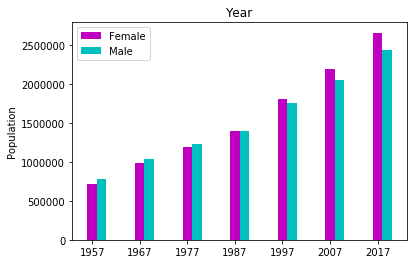

Insight: Till 1987 Growth rate of Male and Female have been Similar, but after 1987 growth rate of Female population has been sligtly higher.


In [753]:
#Bonus Question: Do an exploratory analysis on the data and find out interesting insights.

#Comparision of Gender growth rate
gender_
male_list=[]
female_list=[]
ind=0
#filtering values to obtain male and female population every decade
while ind<len(gender_):
    female_list.append(gender_['value'].iloc[ind])
    male_list.append(gender_['value'].iloc[ind+1])
    ind+=20
ax = plt.subplot(111)

width = np.array([2,2,2,2,2,2,2]) 
ax.bar(years, female_list, width=2, color='m', align='center',label='Female')
ax.bar(years+width, male_list, width=2, color='c', align='center',label='Male')

plt.ylabel('Population')
plt.title('Year')
plt.legend(loc='best')
plt.xticks(years)
plt.show()   
print(color.BOLD + "Insight: Till 1987 Growth rate of Male and Female have been Similar, but after 1987 growth rate of Female population has been sligtly higher." + color.END)


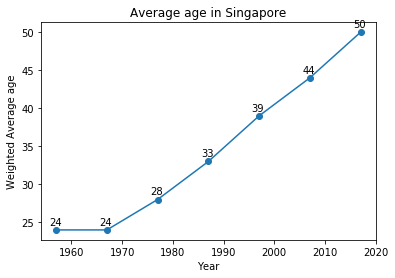

Insight: Clearly, Average age of Singapore is increasing, which proves population of Singapore has more elderly than young people


In [754]:
#Trend of Average age of Singapore
#Replacing the age groups by their median value for accurate approximation
age_['level_2']=age_['level_2'].replace({ '0  -  4 Years' : 2, '5  -  9 Years' : 7, '10 - 14 Years' : 12, '15 - 19 Years' : 17,
                                         '20 - 24 Years' : 22, '25 - 29 Years': 27, '30 - 34 Years': 32, '35 - 39 Years':37,
                                         '40 - 44 Years': 42, '45 - 49 Years': 47, '50 - 54 Years': 52,
                                         '55 - 59 Years': 57, '60 - 64 Years': 62, '65 - 69 Years': 67,
                                         '65 Years & Over': 70, '70 - 74 Years': 72, '70 Years & Over': 75,
                                         '75 - 79 Years': 277, '75 Years & Over': 80,'80 - 84 Years': 82,
                                         '80 Years & Over': 85, '85 Years & Over' : 90})
age_=age_.rename(columns={"level_2": "average_age"})

#calculating the Weighted average for every decade
WeightedAverage_list=[]
for each in years:
    age_yearly=age_[age_['year']==each]
    WeightedAverage_list.append(int((age_yearly["average_age"]*age_yearly["value"]).sum()/age_yearly["value"].sum()))

#plot a line graph for observing the trend in average age
plt.plot(years, WeightedAverage_list,marker='o')
plt.title('Average age in Singapore')
plt.xlabel('Year')
plt.ylabel('Weighted Average age')
for x,y in zip(years,WeightedAverage_list):
    label = "{:}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points", xytext=(-1,5),ha='center')
plt.show()
print(color.BOLD + "Insight: Clearly, Average age of Singapore is increasing, which proves population of Singapore has more elderly than young people" + color.END)
